In [54]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
## In this box we will first load our three datasets which we analyse for business insights
# Load Customers data
customers = pd.read_csv('Customers.csv')
print("Customers Data:")
print(customers.head())

# Load Products data
products = pd.read_csv('Products.csv')
print("\nProducts Data:")
print(products.head())

# Load Transactions data
transactions = pd.read_csv('Transactions.csv')
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [58]:
#We will check the structure of customers data
customers.info()
customers.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [59]:
#Checking for null specifically
print("Missing values in Customers:")
print(customers.isnull().sum())

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [60]:
# Now we will check the structure of products data
products.info()
products.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [61]:
print("\nMissing values in Products:")
print(products.isnull().sum())


Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [62]:
# Now we will check the structure of transactions data
transactions.info()
transactions.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


In [63]:
#Checking for null values explicitely
print("\nMissing values in Transactions:")
print(transactions.isnull().sum())


Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [64]:
# In the customers file we have a column by the name of SignupDate and a column of name TransactionDate in the Transactions file
# We convert SignupDate and TransactionDate to datetime for analysis purpose
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [65]:
print(customers['SignupDate'])

0     2022-07-10
1     2022-02-13
2     2024-03-07
3     2022-10-09
4     2022-08-15
         ...    
195   2022-06-07
196   2023-03-21
197   2022-02-27
198   2022-12-03
199   2023-06-11
Name: SignupDate, Length: 200, dtype: datetime64[ns]


In [66]:
print(transactions['TransactionDate'])

0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-24 08:30:27
996   2024-06-04 02:15:24
997   2024-04-05 13:05:32
998   2024-09-29 10:16:02
999   2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]


In [67]:
# Check for duplicate records
print("Duplicate Customers:", customers.duplicated().sum())
print("Duplicate Products:", products.duplicated().sum())
print("Duplicate Transactions:", transactions.duplicated().sum())

Duplicate Customers: 0
Duplicate Products: 0
Duplicate Transactions: 0


In [68]:
# Merge transactions with customers
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge the above with products
full_data = pd.merge(transactions_customers, products, on='ProductID', how='left')

# Check the merged data
print("Merged Data:")
print(full_data.head())

Merged Data:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speake

In [69]:
# We see that we have two price columns price_x from the transaction file and price_y from the products file
# These two price columns could differ because the final price may change according to the discount or price change during the time of transaction 
#Checking if there is any price difference between actual price and price during transaction

# Calculate the difference between the two price columns
full_data['Price_Difference'] = full_data['Price_x'] - full_data['Price_y']

# Check for transactions where the prices differ
price_mismatches = full_data[full_data['Price_Difference'] != 0]

# Calculate number of transactions with price differences
total_transactions = full_data.shape[0]
mismatched_transactions = price_mismatches.shape[0]


print(f"\nTotal Transactions: {total_transactions}")
print(f"Transactions with Price Differences: {mismatched_transactions}")



Total Transactions: 1000
Transactions with Price Differences: 0


In [70]:
#As both the prices are same therefore there is no point of keeping both now
full_data.drop(columns=['Price_y','Price_Difference'],inplace=True)

In [71]:
full_data.rename(columns ={'Price_x' : 'Price'},inplace=True)

In [73]:
full_data.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000,1000,1000
unique,1000,199,100,NaN,NaN,NaN,NaN,199,4,NaN,66,4
top,T00001,C0109,P059,NaN,NaN,NaN,NaN,Abigail Jones,South America,NaN,ActiveWear Smartwatch,Books
freq,1,11,19,NaN,NaN,NaN,NaN,11,304,NaN,40,270
mean,NaN,NaN,NaN,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,NaN,NaN,2023-07-09 02:49:55.199999744,NaN,NaN
min,NaN,NaN,NaN,2023-12-30 15:29:12,1.000000,16.080000,16.08000,NaN,NaN,2022-01-22 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,NaN,NaN,2022-09-17 12:00:00,NaN,NaN
50%,NaN,NaN,NaN,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,NaN,NaN,2023-07-23 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,NaN,NaN,2024-04-12 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,NaN,NaN,2024-12-28 00:00:00,NaN,NaN


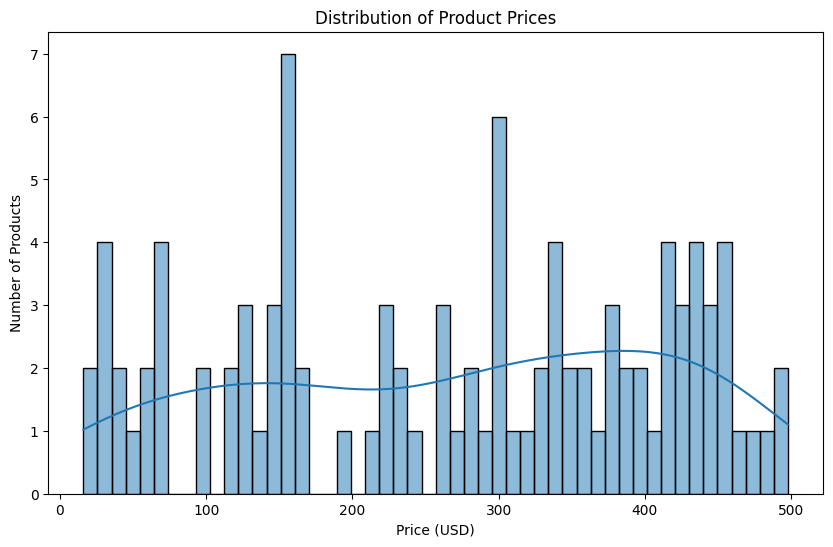

In [77]:
# Histogram of product prices
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')
plt.savefig('Distribution_of_Product_Prices.png', dpi=300, bbox_inches='tight')
plt.show()

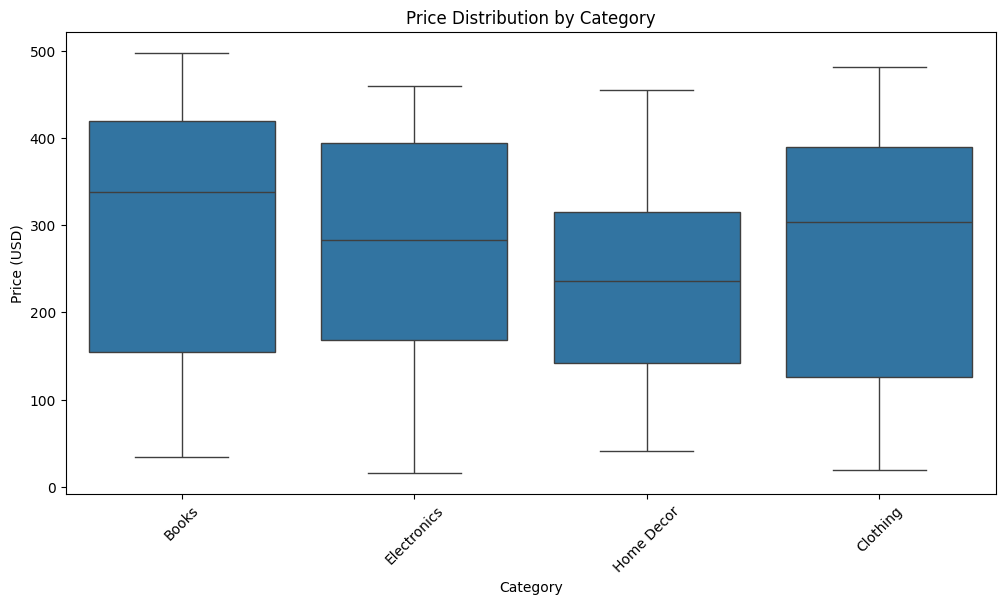

In [78]:
# Boxplot of product prices by category
plt.figure(figsize=(12,6))
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.savefig('Price Distribution by Category.png', dpi=300, bbox_inches='tight')
plt.show()

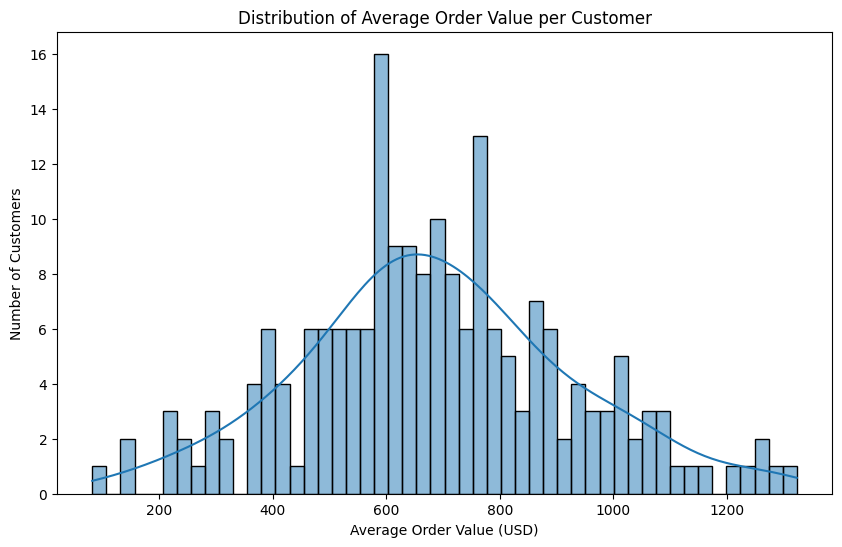

In [80]:
# Calculate total and average spending per customer
customer_spending = full_data.groupby('CustomerID')['TotalValue'].agg(['sum', 'mean'])

# Histogram of average order values
plt.figure(figsize=(10,6))
sns.histplot(customer_spending['mean'], bins=50, kde=True)
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value (USD)')
plt.ylabel('Number of Customers')
plt.savefig('Distribution of Average Order Value per Customer.png', dpi=300, bbox_inches='tight')
plt.show()

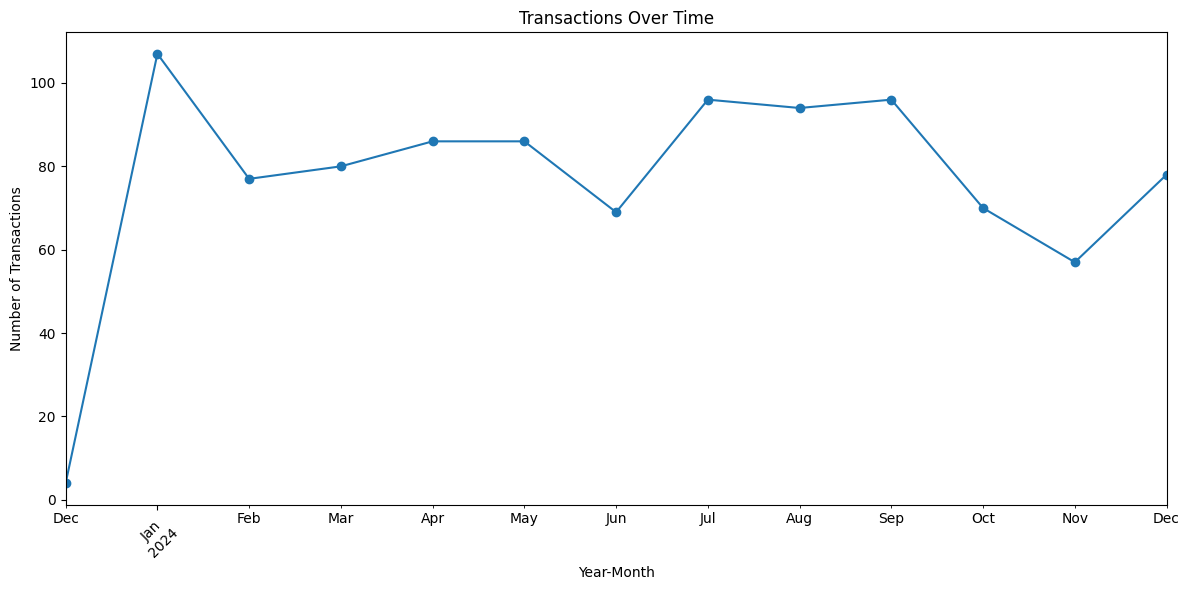

In [82]:
# Extract year and month from TransactionDate
full_data['TransactionYearMonth'] = full_data['TransactionDate'].dt.to_period('M')

# Group by year-month
transactions_trends = full_data.groupby('TransactionYearMonth').size()

# Plot the transactions over time
plt.figure(figsize=(12,6))
transactions_trends.plot(marker='o')
plt.title('Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Number of Transactions per Month.png', dpi=300, bbox_inches='tight')
plt.show()

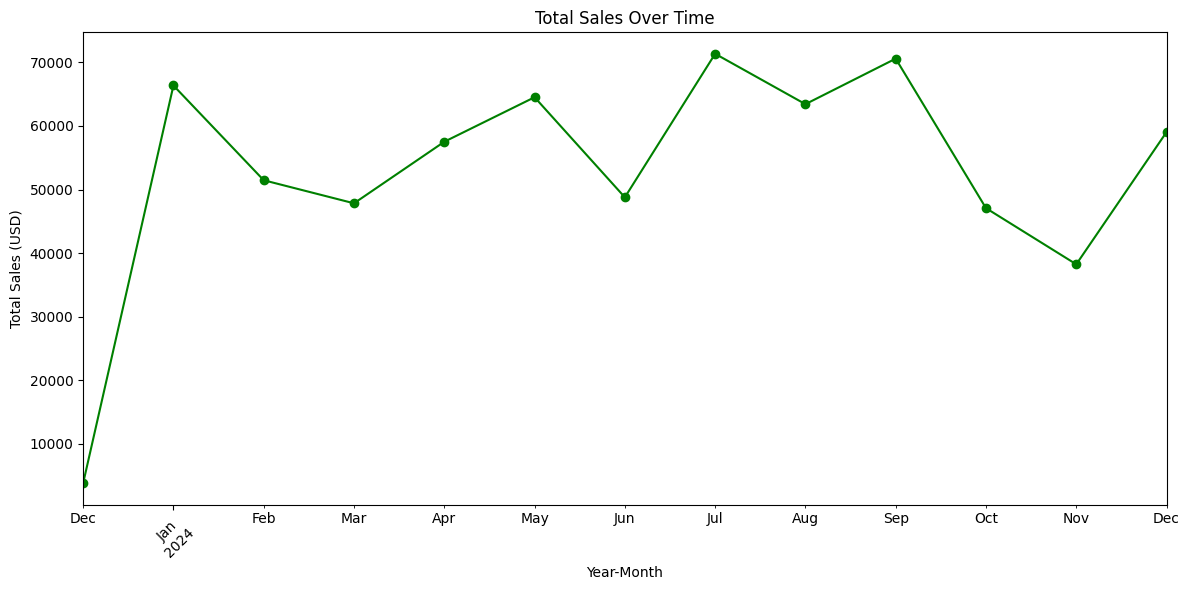

In [95]:
# Calculate total sales per month
sales_trends = full_data.groupby('TransactionYearMonth')['TotalValue'].sum()

# Plot total sales over time
plt.figure(figsize=(12,6))
sales_trends.plot(marker='o', color='green')
plt.title('Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Total Sales per Month.png', dpi=300, bbox_inches='tight')
plt.show()

In [90]:
# Group by TransactionYearMonth and Region, then sum the TotalValue
sales_region_month = full_data.groupby(['TransactionYearMonth', 'Region'])['TotalValue'].sum().reset_index()

# Display the first few rows of the result
print(sales_region_month.head())

  TransactionYearMonth         Region  TotalValue
0              2023-12           Asia     1585.36
1              2023-12         Europe     1272.72
2              2023-12  North America      911.44
3              2024-01           Asia    19429.97
4              2024-01         Europe    19287.27


In [91]:
# Pivot the data to have regions as columns
sales_pivot = sales_region_month.pivot(index='TransactionYearMonth', columns='Region', values='TotalValue')

# Sort the index (TransactionYearMonth)
sales_pivot = sales_pivot.sort_index()

# Display the pivoted DataFrame
print(sales_pivot.head())


Region                    Asia    Europe  North America  South America
TransactionYearMonth                                                  
2023-12                1585.36   1272.72         911.44            NaN
2024-01               19429.97  19287.27       12277.27       15381.88
2024-02                8960.31  10442.93       13286.83       18769.20
2024-03                9875.56  12553.90       14974.31       10424.96
2024-04               10371.77  11775.14       22969.02       12403.13


<Figure size 1200x600 with 0 Axes>

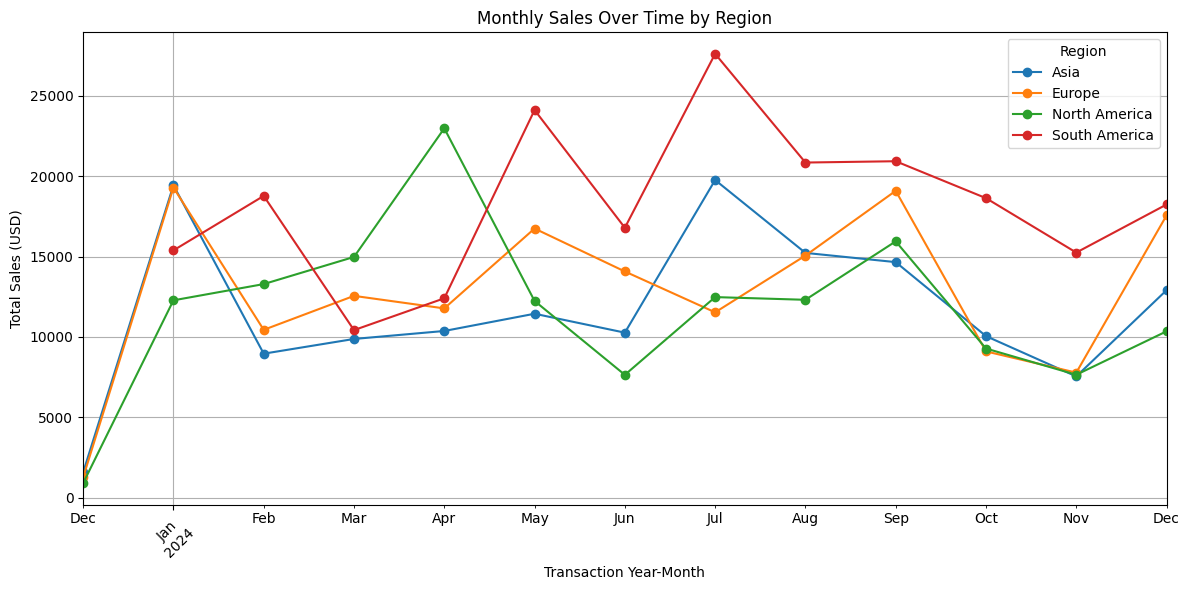

In [96]:
# Plot the monthly sales over time for each region
plt.figure(figsize=(12, 6))
sales_pivot.plot(marker='o', figsize=(12, 6))
plt.title('Monthly Sales Over Time by Region')
plt.xlabel('Transaction Year-Month')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Monthly Sales Over Time by Region.png', dpi=300, bbox_inches='tight')
plt.show()

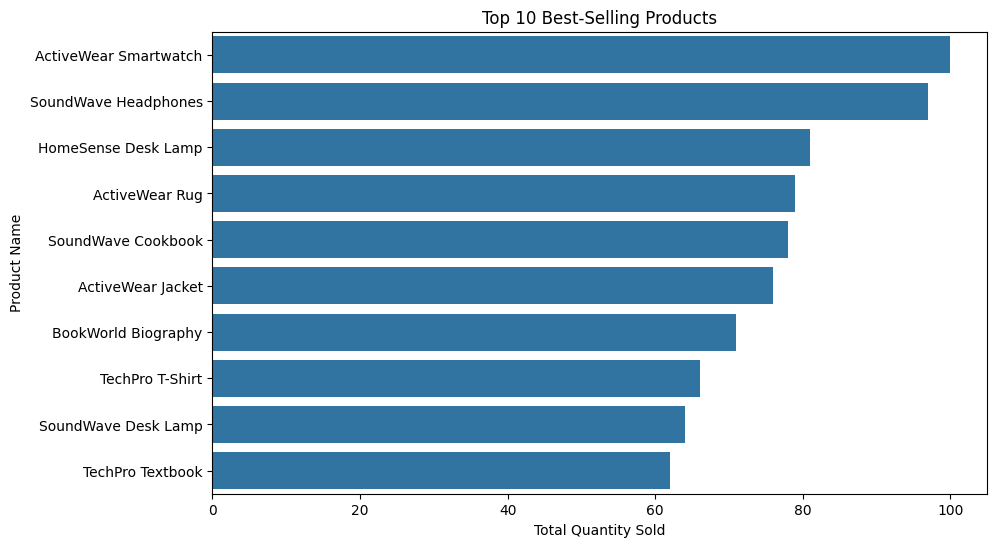

In [97]:
# Sum quantities sold per product
top_products = full_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top 10 selling products
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.savefig('Top 10 Best-Selling Products.png', dpi=300, bbox_inches='tight')
plt.show()

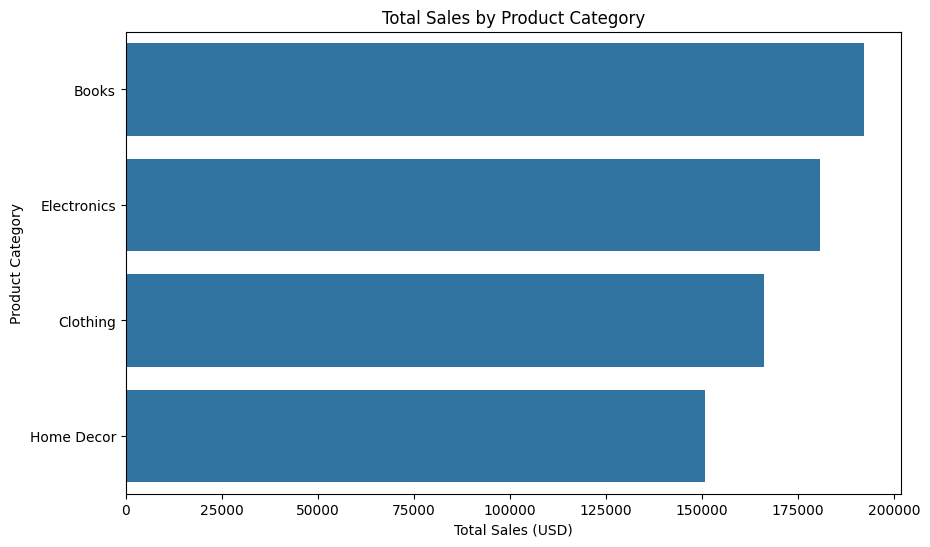

In [98]:
# Calculate total sales per category
sales_by_category = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot sales by category
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index)
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Category')
plt.savefig('Total Sales by Product Category.png', dpi=300, bbox_inches='tight')
plt.show()

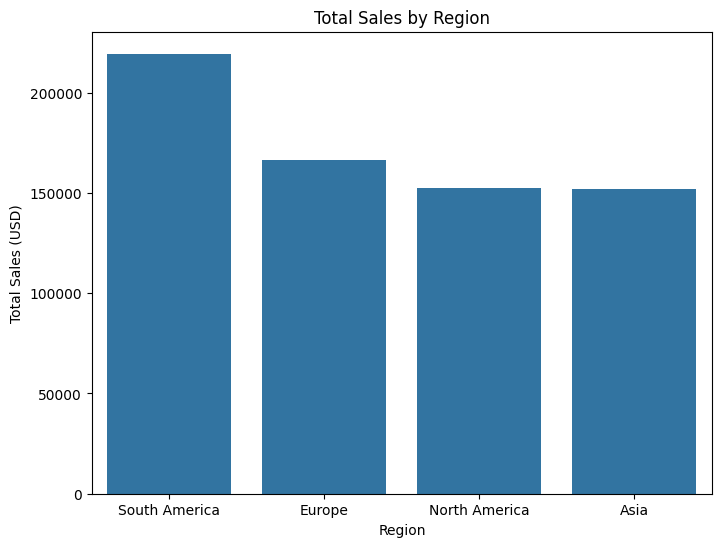

In [99]:
# Group by region and calculate total sales
sales_by_region = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot sales by region
plt.figure(figsize=(8,6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.savefig('Total Sales by Region.png', dpi=300, bbox_inches='tight')
plt.show()

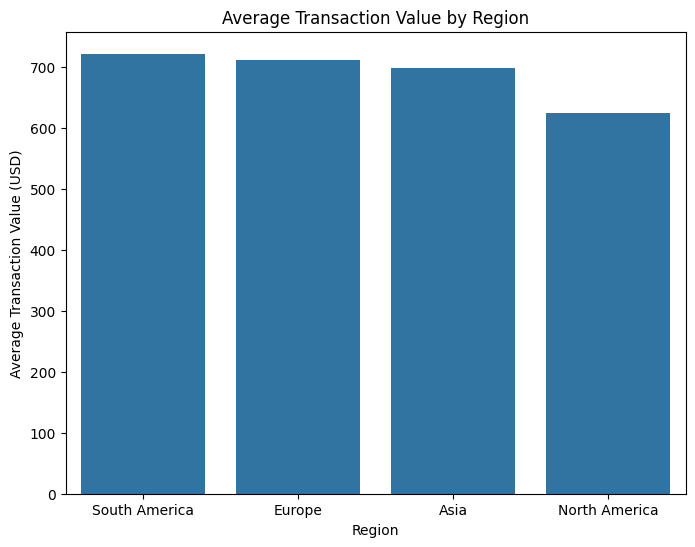

In [100]:
# Calculate average transaction value per region
avg_transaction_value_region = full_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Plot average transaction value by region
plt.figure(figsize=(8,6))
sns.barplot(x=avg_transaction_value_region.index, y=avg_transaction_value_region.values)
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.savefig('Average Transaction Value by Region.png', dpi=300, bbox_inches='tight')
plt.show()

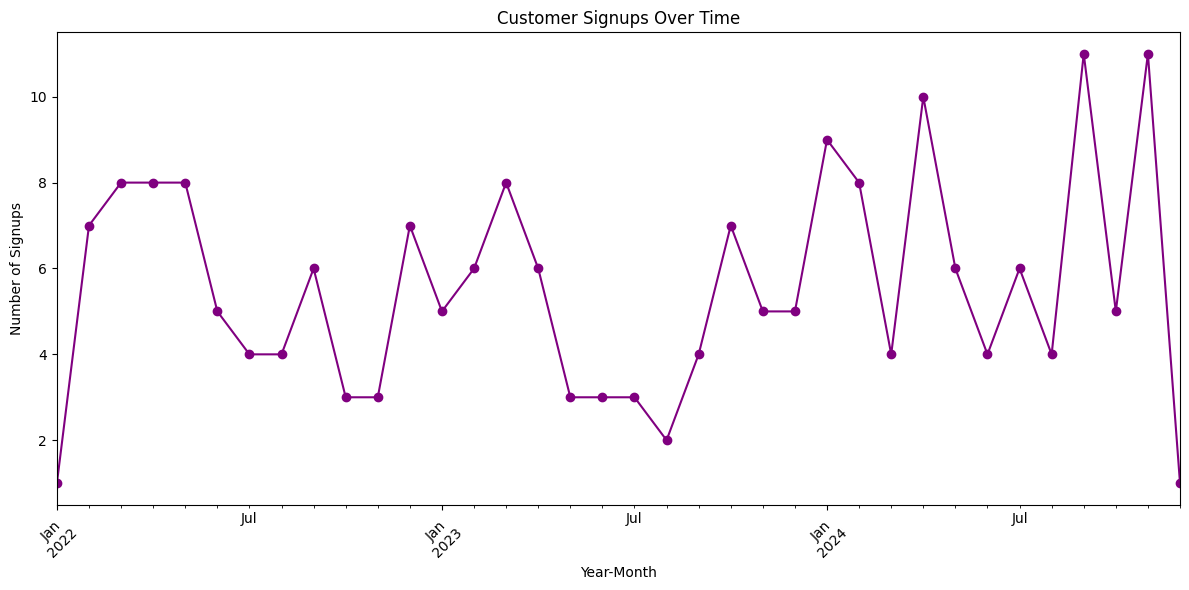

In [101]:
# Extract year and month from SignupDate
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

# Count signups per month
signup_trends = customers.groupby('SignupYearMonth').size()

# Plot the signups over time
plt.figure(figsize=(12,6))
signup_trends.plot(marker='o', color='purple')
plt.title('Customer Signups Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Customer Signups Over Time.png', dpi=300, bbox_inches='tight')
plt.show()

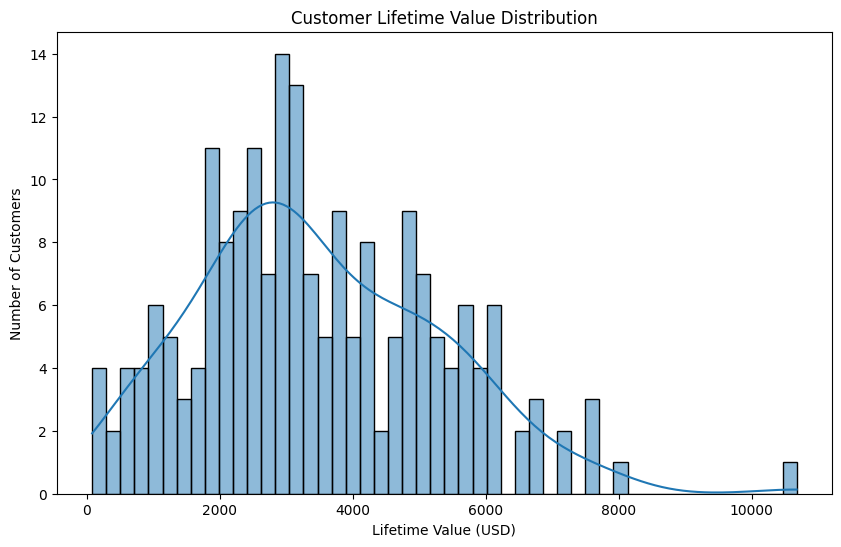

In [102]:
clv = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Plot CLV distribution
plt.figure(figsize=(10, 6))
sns.histplot(clv['TotalValue'], bins=50, kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Lifetime Value (USD)')
plt.ylabel('Number of Customers')
plt.show()
